In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import MDAnalysis as mda
from MDAnalysis.analysis import msd

In [2]:
mda_traj = mda.Universe("../1-SPCE_343-H2O/topology.pdb", "../1-SPCE_343-H2O/traj.xyz", dt=0.01) # dt=0.01 ps

In [3]:
mda_traj.dimensions = [21.725, 21.725, 21.725, 90, 90, 90] # PBC box : lx ly lz alpha beta gamma

In [4]:
msd_O = msd.EinsteinMSD(mda_traj, select="name O", msd_type ='xyz', fft=False,verbose=True)
msd_O.run()

  0%|          | 0/1001 [00:00<?, ?it/s]

In [5]:
def all_coordinates(mda_object):
    c = np.zeros((mda_object.trajectory.n_frames,mda_object.trajectory.n_atoms,3))
    for i in range(mda_object.trajectory.n_frames):
        c[i,:,:] = mda_object.trajectory[i].positions
    return c

In [6]:
def all_coordinates_nameO(mda_object):
    list_atoms = mda_object.atoms.names
    isO = np.array([list_atoms[i] == 'O' for i in range(mda_object.trajectory.n_atoms)])
    nb_O = sum(isO)
    c = np.zeros((mda_object.trajectory.n_frames,nb_O,3))
    for i in range(mda_object.trajectory.n_frames):
        c[i,:,:] = mda_object.trajectory[i].positions[isO]
    return c

In [7]:
coords = all_coordinates_nameO(mda_traj)

In [8]:
coords[1,:,:]

array([[ 4.03209019,  2.65337992, -2.78463006],
       [ 4.65546989,  5.93591022,  0.485475  ],
       [ 1.19101   ,  9.17311954,  2.2569201 ],
       ...,
       [ 1.26372004, -7.44870996,  0.14458001],
       [ 0.560063  , -4.90783024,  0.89794701],
       [ 2.06697989, -3.1826601 , -0.61944997]])

In [10]:
diffpos = np.diff(coords,axis=0) # for all t (axis = 0), all O (axis = 1), x(t+1)-x(t); y(t+1)-y(t); z(t+1)-z(t) (axis=3)

In [11]:
displacement = np.cumsum(diffpos, axis=0) # for all t (axis = 0), all O (axis = 1), x(t+1)-x(0); y(t+1)-y(0); z(t+1)-z(0) (axis=3)

In [12]:
sq_displacement = np.sum(displacement**2,axis=-1) # for all t (axis = 0), all O (axis = 1), |r(t+1) - r(0)|^2

In [16]:
np.mean(sq_displacement, axis=1) # mean over all O

array([4.29894851e-03, 1.37724700e+00, 1.38905550e+00, 1.40923690e+00,
       9.48129897e+00, 9.46786798e+00, 1.20886551e+01, 1.20828458e+01,
       1.20908258e+01, 1.73727641e+01, 1.73576049e+01, 1.86858987e+01,
       1.87061979e+01, 2.13555205e+01, 2.13819970e+01, 2.80488525e+01,
       2.80616236e+01, 2.80743582e+01, 2.53572905e+01, 2.53847149e+01,
       2.40302386e+01, 2.40335389e+01, 2.40402151e+01, 3.05709591e+01,
       3.05784266e+01, 2.92637992e+01, 2.92703028e+01, 3.17586681e+01,
       3.17470997e+01, 3.15690814e+01, 3.15431284e+01, 3.15152347e+01,
       3.14970941e+01, 3.14642183e+01, 3.14267107e+01, 3.13831327e+01,
       3.38555360e+01, 3.38465647e+01, 3.38451472e+01, 3.78749373e+01,
       3.78807017e+01, 3.67561330e+01, 3.68043546e+01, 3.68622570e+01,
       3.29022876e+01, 3.29556466e+01, 3.41363279e+01, 3.41754794e+01,
       3.42082622e+01, 3.41908603e+01, 3.42070752e+01, 3.42285362e+01,
       3.54916108e+01, 3.54971712e+01, 3.83068457e+01, 3.82973649e+01,
      

In [27]:
coords = all_coordinates_nameO(mda_traj)
diffpos = np.diff(coords,axis=0) # for all t (axis = 0), all O (axis = 1), x(t+1)-x(t); y(t+1)-y(t); z(t+1)-z(t) (axis=3)
msd_multiorigins = np.zeros(mda_traj.trajectory.n_frames)
norm_msd_multiorigins = np.zeros(mda_traj.trajectory.n_frames)
norm_msd_multiorigins[0] = 1
for t0 in range(0,mda_traj.trajectory.n_frames,100):
    displacement_t0 = np.cumsum(diffpos[t0:,:,:],axis=0) # for all t after t0 (axis = 0), all O (axis = 1), x(t+1)-x(0); y(t+1)-y(0); z(t+1)-z(0) (axis=3)
    sq_displacement_t0 = np.sum(displacement_t0**2,axis=-1) # for all t after t0 (axis = 0), all O (axis = 1), |r(t+1) - r(0)|^2
    msd_t0 = np.mean(sq_displacement_t0, axis = 1) # mean over all O
    msd_multiorigins[1:msd_t0.shape[0]+1] += msd_t0
    norm_msd_multiorigins[1:msd_t0.shape[0]+1] += 1
m = msd_multiorigins / norm_msd_multiorigins


In [30]:
coords[1,:,:]

array([[ 4.03209019,  2.65337992, -2.78463006],
       [ 4.65546989,  5.93591022,  0.485475  ],
       [ 1.19101   ,  9.17311954,  2.2569201 ],
       ...,
       [ 1.26372004, -7.44870996,  0.14458001],
       [ 0.560063  , -4.90783024,  0.89794701],
       [ 2.06697989, -3.1826601 , -0.61944997]])

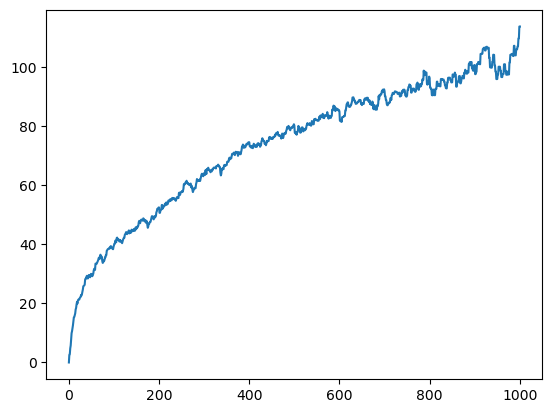

In [28]:
plt.plot(m)

In [95]:
def compute_fluctuations_tcf(random_var, nrange):
    """ 
    Compute the time correlation function of the fluctuations of a random variable given as a LIST of values 
    Only correlations within a given range of entries (nrange) are considered for the tcf calculation, no units
    are considered within the function, only indexes.
    """
    tcf = []
    mod_rdvar =  np.vstack( (random_var, np.zeros(random_var.shape) ))
    for n in range(nrange): # Vector product to compute sum of the covariance (average with only n-distant variables)
        sum_in_C = np.sum( np.multiply( mod_rdvar, np.roll(mod_rdvar, n,axis=0) ) ,axis=0)/(random_var.shape[0] - n)
        tcf.append(np.mean(sum_in_C))
    return(tcf)

In [96]:
compute_fluctuations_tcf(np.cumsum(sq_diffpos,axis=0),1000)

[4914233.166637385,
 4912729.625684688,
 4911223.058885476,
 4909712.725978981,
 4908165.584442012,
 4906625.698536432,
 4905013.868888065,
 4903416.299501614,
 4901762.831211443,
 4900061.09484337,
 4898326.624037515,
 4896554.09243692,
 4894755.767399682,
 4892962.814773422,
 4891138.763203083,
 4889312.287624783,
 4887455.236357892,
 4885593.825597837,
 4883704.330224083,
 4881786.000721389,
 4879867.087190735,
 4877922.542225359,
 4875947.00621302,
 4873968.7867382355,
 4871964.711315767,
 4869968.423862801,
 4867948.855263662,
 4865927.840842929,
 4863885.432858799,
 4861839.554294628,
 4859766.86992985,
 4857669.950438905,
 4855561.311881883,
 4853430.985528782,
 4851283.61020694,
 4849113.760725009,
 4846924.691963633,
 4844727.70536179,
 4842506.0551775675,
 4840263.6612599185,
 4838003.831390566,
 4835721.809143194,
 4833416.854323405,
 4831105.094120299,
 4828770.303105438,
 4826446.805496941,
 4824104.928043556,
 4821740.540114793,
 4819348.826572212,
 4816954.864001185,
 48

In [67]:
diffpos[0,0,0]

-0.01094961166381836

In [70]:
coords[0:2,0,0]

array([4.0430398 , 4.03209019])

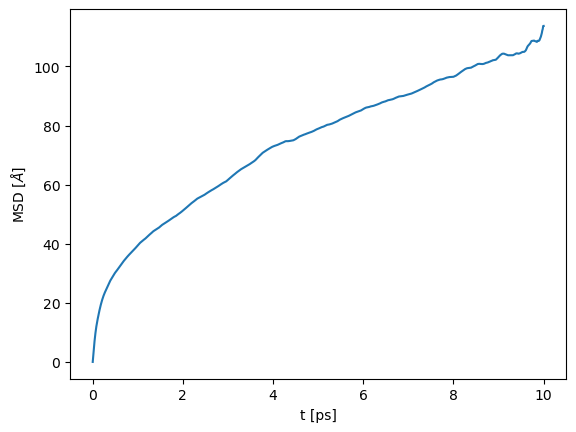

In [15]:
plt.plot(np.arange(msd_O.n_frames)*mda_traj.trajectory.dt, msd_O.results.timeseries)
plt.xlabel("t [ps]")
plt.ylabel("MSD ["+r'$\AA$'+"]")
plt.show()

In [21]:
time_comparison = np.genfromtxt("msd.out")[:,0]
msd_comparison = np.genfromtxt("msd.out")[:,1]*100

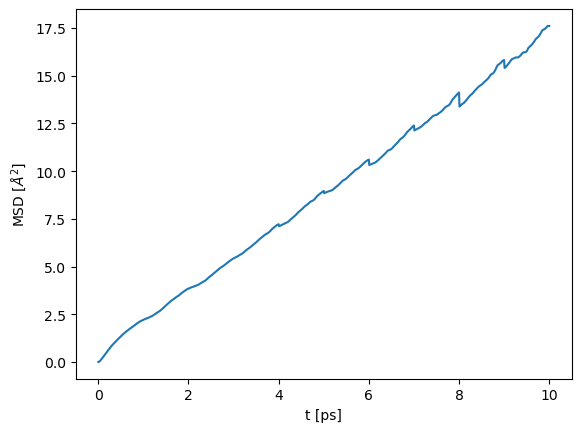

In [22]:
plt.plot(time_comparison,msd_comparison)
plt.xlabel("t [ps]")
plt.ylabel("MSD ["+r'$\AA^2$'+"]")
plt.show()

In [16]:
from scipy.optimize import curve_fit

In [17]:
def f(t,d,a):
    return 6*d*t + a

In [18]:
linear_fit,_ = curve_fit(f,np.arange(msd_O.n_frames)[200:]*mda_traj.trajectory.dt, msd_O.results.timeseries[200:],[1,20])

In [19]:
print(linear_fit[0])

1.1304921404944797


In [23]:
linear_fit,_ = curve_fit(f,time_comparison,msd_comparison,[1,20])

In [24]:
print(linear_fit[0])

0.28041140938087344


In [5]:
def plot_rdf(selection1, selection2, graph_title):
    rdf_object = rdf.InterRDF(selection1, selection2, nbins=150, range=(0.1,10),verbose=True)
    rdf_object.run()
    
    plt.plot(rdf_object.results.bins, rdf_object.results.rdf)
    plt.xlabel("r "+r'[$\AA{}$]')
    plt.ylabel("g(r)")
    plt.title(graph_title)
    plt.show()

  0%|          | 0/1001 [00:00<?, ?it/s]

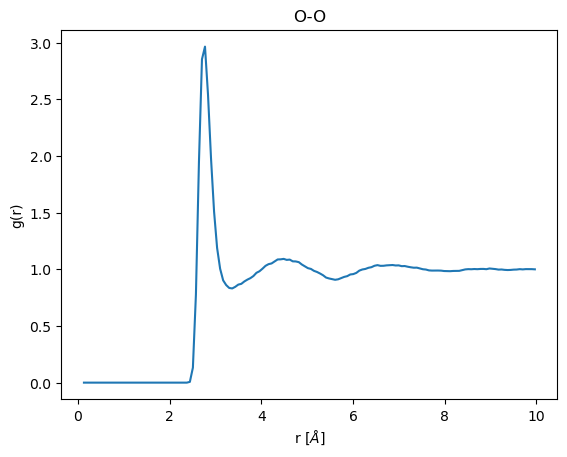

In [6]:
plot_rdf(s1,s1,"O-O")

  0%|          | 0/1001 [00:00<?, ?it/s]

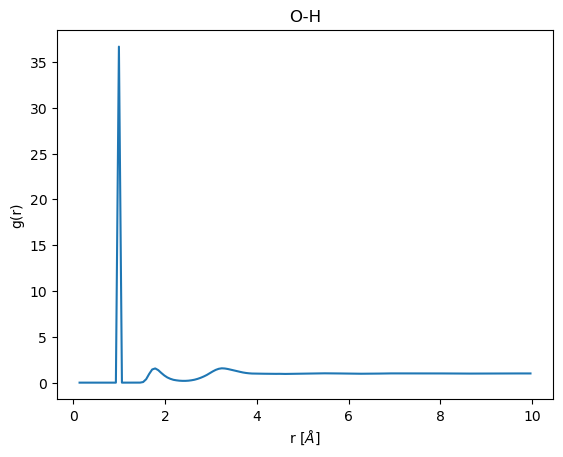

In [7]:
plot_rdf(s1,s2,"O-H")

  0%|          | 0/1001 [00:00<?, ?it/s]

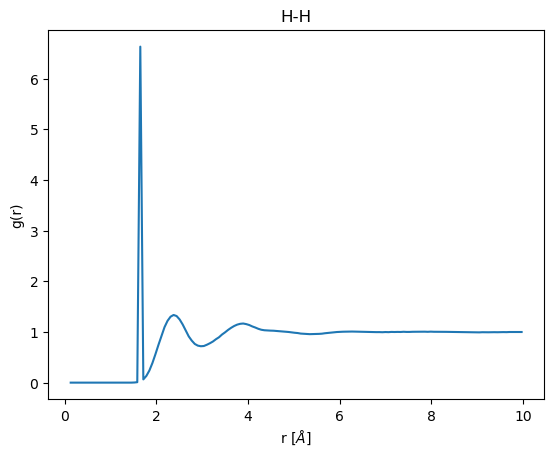

In [8]:
plot_rdf(s2,s2,"H-H")